In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = '.\concrete_mix_design_simplified.csv'
df = pd.read_csv(file)
df = df[df['age'] >= 28]

In [3]:
df_names = df.columns.tolist()
#df_names

['probe_index',
 'name',
 'weight_fresh',
 'weight_at_test',
 'size_x',
 'size_y',
 'size_z',
 'age',
 'density_fresh',
 'density_at_test',
 'q_cement',
 'q_water',
 'id_cement',
 'cement_label',
 'sand_coarsness',
 'q_crushed_sand',
 'q_non_crushed_sand',
 'q_ash',
 'id_crushed_sand',
 'id_non_crushed_sand',
 'id_ash',
 'q_stone_1',
 'q_stone_2',
 'q_stone_3',
 'id_stone',
 'stone_type',
 'slump',
 'q_airentrain',
 'q_waterproofing',
 'q_retardant',
 'q_superplast',
 'q_plast',
 'compressive_strength',
 'slump.1']

In [4]:
nan_columns = df.columns[df.isna().any()].tolist()
nan_columns

['weight_fresh',
 'weight_at_test',
 'size_x',
 'size_y',
 'size_z',
 'density_fresh',
 'density_at_test',
 'sand_coarsness',
 'id_ash',
 'id_stone',
 'stone_type',
 'slump',
 'q_airentrain',
 'q_waterproofing',
 'q_retardant',
 'q_superplast',
 'q_plast',
 'compressive_strength',
 'slump.1']

In [5]:
nan_count = df[['density_fresh', 'density_at_test', 'compressive_strength']].isna().sum()
nan_count

density_fresh           45
density_at_test         19
compressive_strength    20
dtype: int64

In [6]:
nan_rows = df[df[['density_fresh', 'density_at_test']].isna().all(axis=1)]
nan_rows

,probe_index,name,weight_fresh,weight_at_test,size_x,size_y,size_z,age,density_fresh,density_at_test,...,id_stone,stone_type,slump,q_airentrain,q_waterproofing,q_retardant,q_superplast,q_plast,compressive_strength,slump.1
919,2,Kul_2007_0010_I,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,...,14.0,crushed_stone,11.0,0.0,0.0,0.0,0.01,0.01,NaN,11.0
920,3,Kul_2007_0010_I,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,...,14.0,crushed_stone,11.0,0.0,0.0,0.0,0.01,0.01,NaN,11.0
923,2,Kul_2007_0024_II,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,...,14.0,crushed_stone,13.0,0.0,0.0,0.0,0.01,0.01,NaN,13.0
924,3,Kul_2007_0024_II,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,...,14.0,crushed_stone,13.0,0.0,0.0,0.0,0.01,0.01,NaN,13.0
927,2,Kul_2007_0038_III,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,...,14.0,crushed_stone,19.0,0.0,0.0,0.0,0.01,0.01,NaN,19.0
928,3,Kul_2007_0038_III,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,...,14.0,crushed_stone,19.0,0.0,0.0,0.0,0.01,0.01,NaN,19.0
931,2,Kul_2007_0052_IV,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,...,4.0,crushed_stone,14.5,0.0,0.0,0.0,0.01,0.01,NaN,14.5
932,3,Kul_2007_0052_IV,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,...,4.0,crushed_stone,14.5,0.0,0.0,0.0,0.01,0.01,NaN,14.5
935,2,Kul_2007_0074_I,7750.0,NaN,NaN,NaN,NaN,29.0,NaN,NaN,...,14.0,crushed_stone,14.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0
936,3,Kul_2007_0074_I,7755.0,NaN,NaN,NaN,NaN,29.0,NaN,NaN,...,14.0,crushed_stone,14.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0


In [7]:
df.drop(nan_rows.index, inplace=True)

In [8]:
df = df[(df['density_fresh'] < 3000)  & (df['compressive_strength'] > 1)&(df['density_at_test'] < 3000)&(df['density_at_test'] > 1000) ]

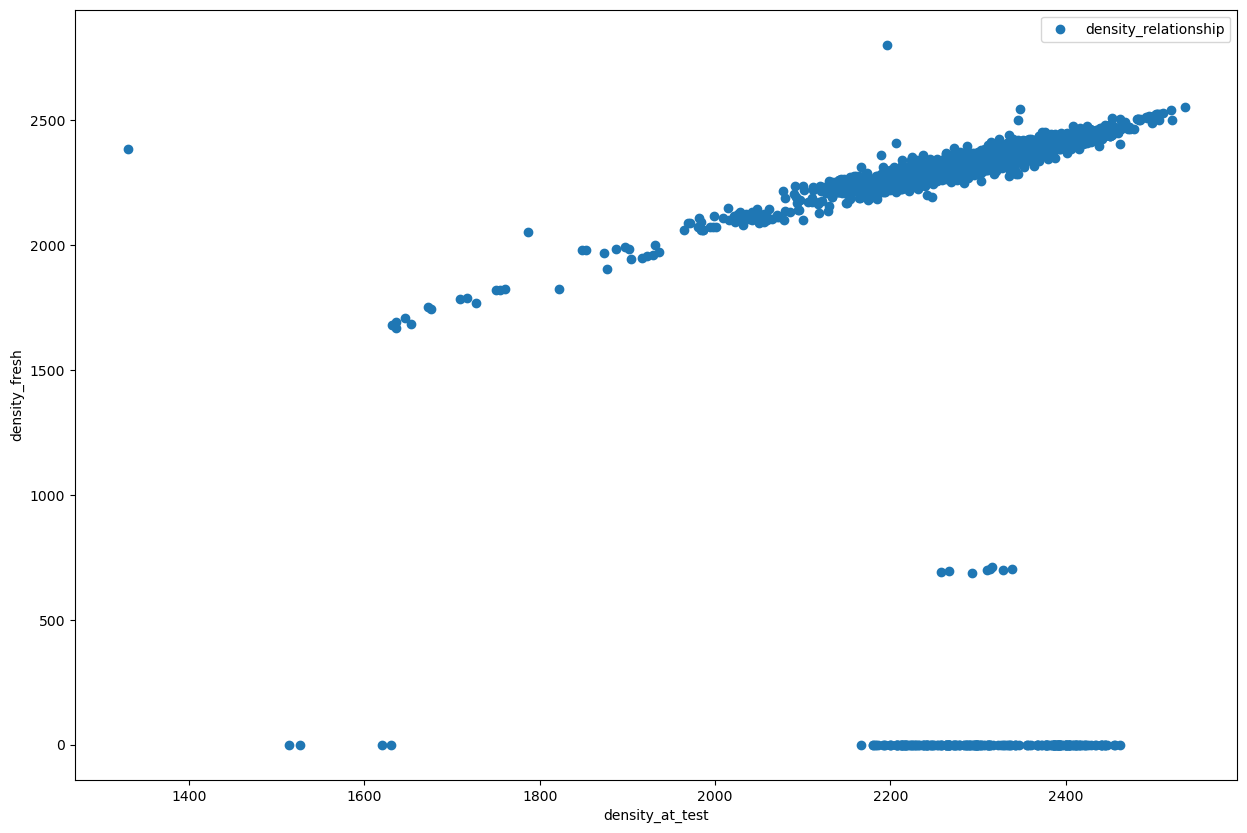

In [9]:
plt.figure(figsize=(15, 10))
density_at_test = df['density_at_test']
density_fresh = df['density_fresh']
plt.scatter( density_at_test, density_fresh, label='density_relationship')
plt.xlabel('density_at_test')
plt.ylabel('density_fresh')
plt.legend()